In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/customer-churn-prediction-2020/sampleSubmission.csv
/kaggle/input/customer-churn-prediction-2020/train.csv
/kaggle/input/customer-churn-prediction-2020/test.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
train = pd.read_csv("/kaggle/input/customer-churn-prediction-2020/train.csv")

In [6]:
train.head(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
5,MO,147,area_code_415,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,no
6,LA,117,area_code_408,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,no
7,WV,141,area_code_415,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,no
8,IN,65,area_code_415,no,no,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,yes
9,RI,74,area_code_415,no,no,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,no


In [5]:
train['churn'].value_counts()

no     3652
yes     598
Name: churn, dtype: int64

The above target variable "churn" denotes whether a customer would leave the subscription or stay. Total : yes is 598 and No: 3652. The dataset is highly imbalanced.

In [6]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [9]:
def value_counts(column):
    print(train[column].value_counts())
    train[column].value_counts().plot.bar()
    plt.show()

### Categorizing columns into object,float and int.

In [7]:
from collections import Counter
data_types = train.dtypes
d = []
for i in train.dtypes:
    d.append(i)
print(Counter(d))

Counter({dtype('float64'): 8, dtype('int64'): 7, dtype('O'): 5})


state
---------
WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NJ     96
NY     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
MI     87
KS     87
RI     87
MD     86
VT     86
KY     85
IN     83
NV     83
MS     82
MT     80
MO     80
NC     80
CO     80
WA     80
DE     80
TN     79
IL     79
OK     78
NH     78
NM     78
AZ     77
HI     77
FL     76
SD     75
NE     73
SC     72
DC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64


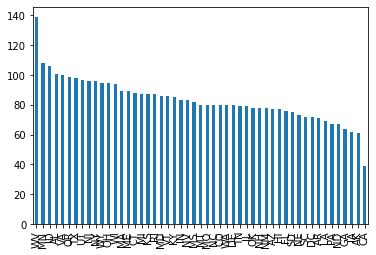

area_code
---------
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64


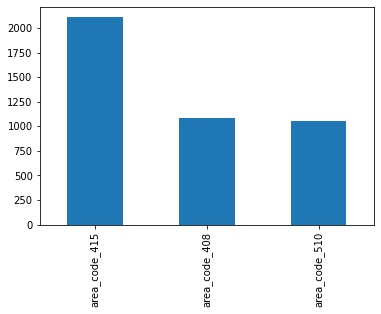

international_plan
---------
no     3854
yes     396
Name: international_plan, dtype: int64


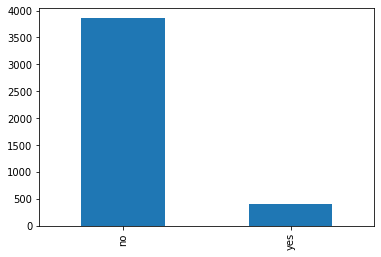

voice_mail_plan
---------
no     3138
yes    1112
Name: voice_mail_plan, dtype: int64


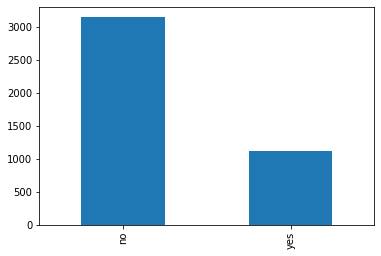

churn
---------
no     3652
yes     598
Name: churn, dtype: int64


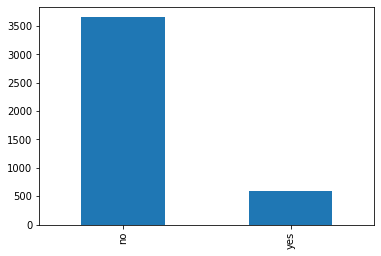

In [10]:
data_types = train.dtypes
for i in range(0,len(data_types)):
    if data_types[i] == "object":
        print(data_types.index[i])
        print('---------')
     
        value_counts(data_types.index[i])


<AxesSubplot:>

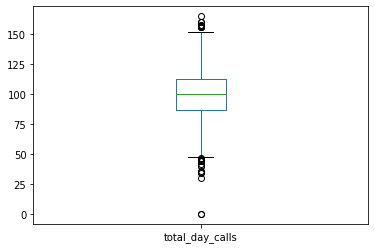

In [59]:
train['total_day_calls'].plot.box()

In [63]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

<AxesSubplot:>

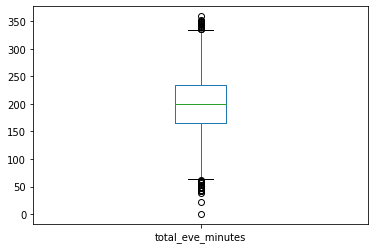

In [64]:
train['total_eve_minutes'].plot.box()

<AxesSubplot:>

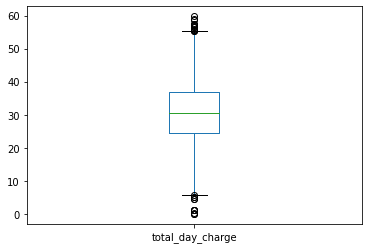

In [66]:
train['total_day_charge'].plot.box()

<AxesSubplot:>

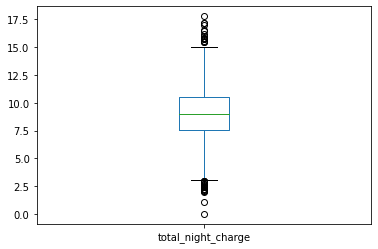

In [73]:
train['total_night_charge'].plot.box()

<AxesSubplot:ylabel='Frequency'>

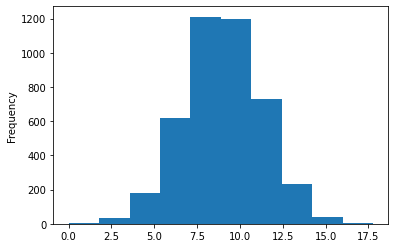

In [74]:
train['total_night_charge'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

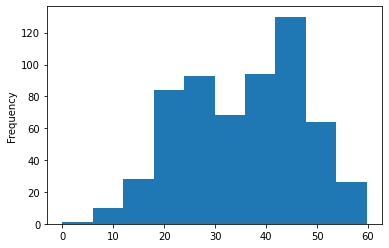

In [70]:
churn['total_day_charge'].plot.hist()

<AxesSubplot:>

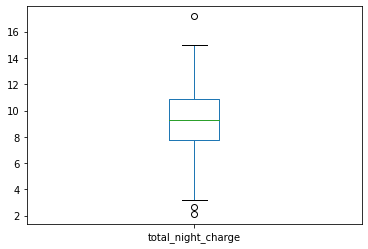

In [71]:
churn['total_night_charge'].plot.box()

<AxesSubplot:ylabel='Frequency'>

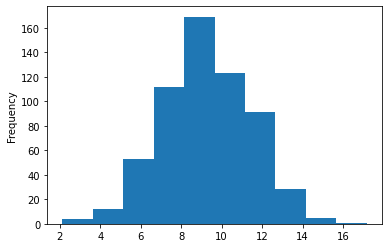

In [72]:
churn['total_night_charge'].plot.hist()

In [60]:
churn = train.loc[train['churn'] == "yes"]

<AxesSubplot:>

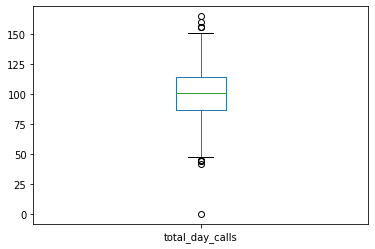

In [61]:
churn['total_day_calls'].plot.box()

<AxesSubplot:>

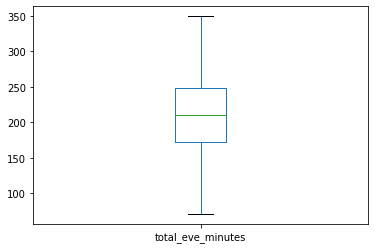

In [65]:
churn['total_eve_minutes'].plot.box()

<AxesSubplot:>

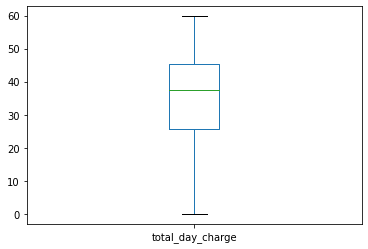

In [67]:
churn['total_day_charge'].plot.box()

<AxesSubplot:ylabel='Frequency'>

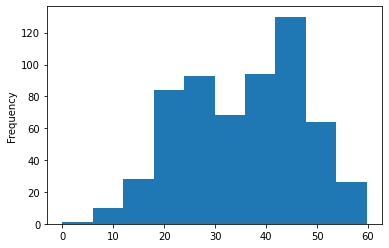

In [69]:
churn['total_day_charge'].plot.hist()

In [75]:
no_churn = train.loc[train['churn'] == "no"]

<AxesSubplot:>

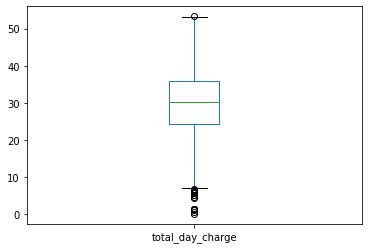

In [76]:
no_churn['total_day_charge'].plot.box()

## Encode categorical features:

In [16]:
from sklearn.preprocessing import LabelEncoder
for i in range(0,len(train.dtypes)):
    if train.dtypes[i] == 'object':
        print(train.dtypes.index[i])
        le = LabelEncoder()
        transformed = le.fit_transform(train[train.dtypes.index[i]])
        train[train.dtypes.index[i]] = transformed

state
area_code
international_plan
voice_mail_plan
churn


In [17]:
train

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,35,107,1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,31,137,1,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,35,84,0,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
3,36,75,1,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,19,121,2,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,26,83,1,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,0
4246,49,73,0,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,0
4247,27,75,0,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,0
4248,11,50,0,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0


## Understanding Baseline:
Understanding the baseline using RandomForestClassier:

In [23]:
Y= train['churn']
X= train.drop(columns = ['churn'])

In [27]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.25)

In [33]:
#Model building:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier()
clf.fit(Xtrain,Ytrain)


RandomForestClassifier()

In [41]:
predict = clf.predict(Xtest)
accuracy = accuracy_score(Ytest, predict)
print("Accuracy:",accuracy)


Accuracy: 0.9576669802445907


In [52]:
from sklearn.metrics import confusion_matrix,f1_score
cm = pd.DataFrame(confusion_matrix(Ytest, predict), )
print(cm)

     0    1
0  911    3
1   42  107


In [54]:
f1_score(Ytest, predict)

0.8262548262548262

## Predicting in Test file:

In [60]:
test= pd.read_csv("/kaggle/input/customer-churn-prediction-2020/test.csv")

In [61]:
test

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


## LabelEncode Testfile:

In [64]:
for i in range(0,len(test.dtypes)):
    if test.dtypes[i] == 'object':
        print(test.dtypes.index[i])
        test_le = LabelEncoder()
        test_transformed = test_le.fit_transform(test[test.dtypes.index[i]])
        test[test.dtypes.index[i]] = test_transformed

state
area_code
international_plan
voice_mail_plan


In [65]:
test.head(10)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,16,128,1,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,1,118,2,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,12,62,1,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,46,93,2,0,0,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,29,174,1,0,0,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
5,6,14,142,1,0,0,0,84.8,95,14.42,136.7,63,11.62,250.5,148,11.27,14.2,6,3.83,2
6,7,18,172,0,0,0,0,212.0,121,36.04,31.2,115,2.65,293.3,78,13.20,12.6,10,3.40,3
7,8,10,72,1,0,1,37,220.0,80,37.40,217.3,102,18.47,152.8,71,6.88,14.7,6,3.97,3
8,9,31,149,0,0,0,0,140.4,94,23.87,271.8,92,23.10,188.3,108,8.47,11.1,9,3.00,1
9,10,13,119,1,0,0,0,159.1,114,27.05,231.3,117,19.66,143.2,91,6.44,8.8,3,2.38,5


In [67]:
test.set_index("id",inplace=True)

In [68]:
test_predict = clf.predict(test)

In [71]:
samplesub = pd.read_csv("/kaggle/input/customer-churn-prediction-2020/sampleSubmission.csv")
samplesub.head(10)

,id,churn
0,1,yes
1,2,no
2,3,no
3,4,yes
4,5,yes
5,6,no
6,7,no
7,8,no
8,9,no
9,10,yes


In [72]:
sujan_submission = pd.DataFrame()
sujan_submission['id'] = test.index
sujan_submission['churn'] = test_predict

In [81]:
coder = []
for val in sujan_submission['churn']:
    
    if val ==1:
        coder.append('yes')
    else:
        coder.append('no')
sujan_submission['churn'] = coder

In [85]:
sujan_submission.set_index('id',inplace=True)

In [86]:
sujan_submission.to_csv('/kaggle/working/sujansubmission.csv')

## Final Prediction score with baseline model:

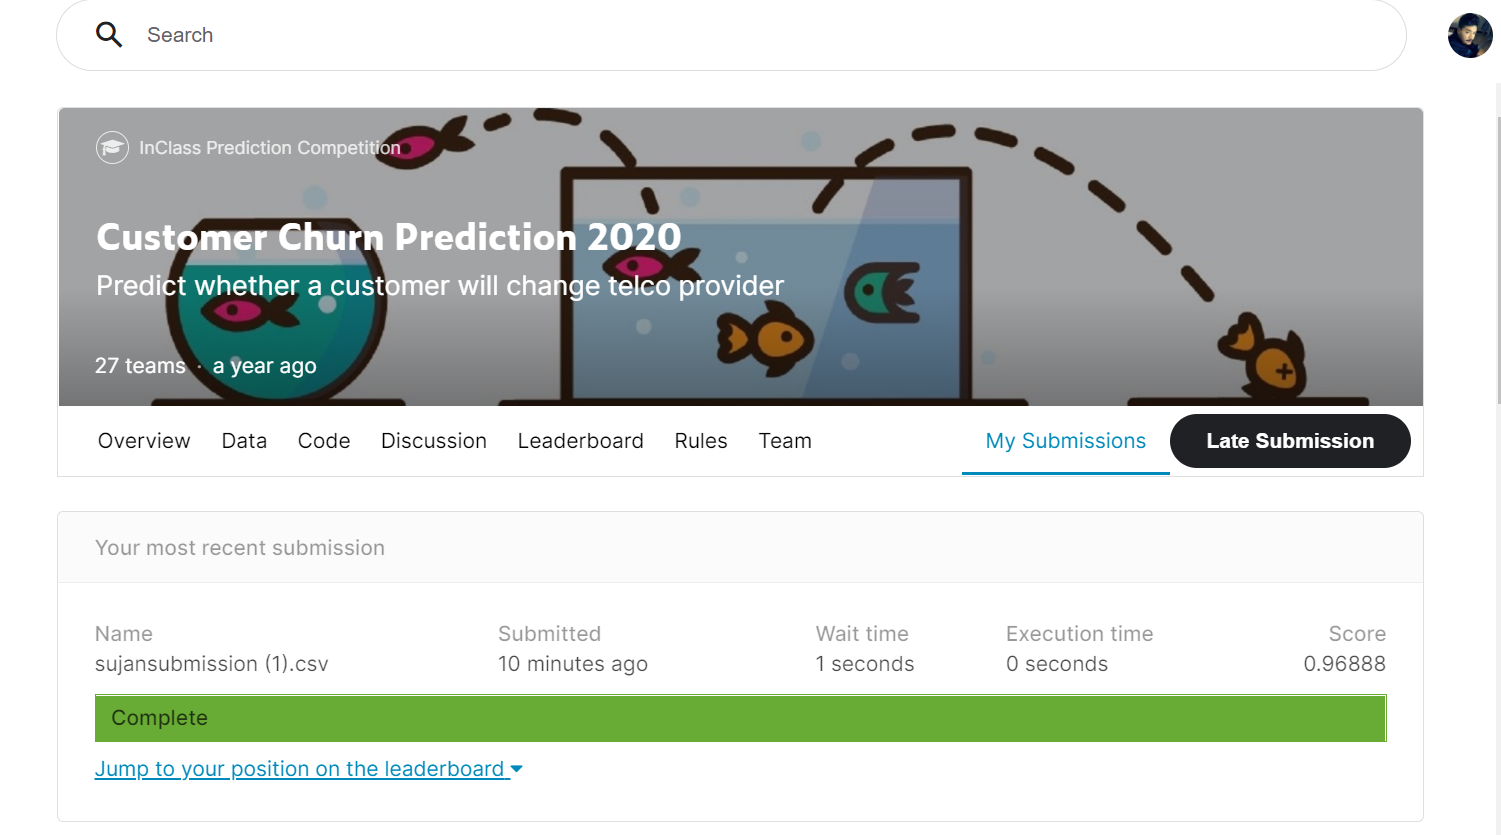
